In [1]:
library(tidyr)
library(tidyverse)
library(dplyr)
library(ggplot2)
library("ggpubr")
library(rstatix)
library(tidyverse)
#library(Stringr)
library(lubridate)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ purrr     1.0.4
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.2     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




In [2]:
#read CEMP data

CREMP_Counts = read.csv("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/metadata/CREMP_data/CREMP_Counts.csv", 
                header = T
)
head(CREMP_Counts , n=2)
dim(CREMP_Counts )


CREMP_LTA = read.csv("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/metadata/CREMP_data/CREMP_LTA.csv", 
                header = T
)
head(CREMP_LTA , n=2)
dim(CREMP_LTA )



CREMP_Cover = read.csv("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/metadata/CREMP_data/CREMP_percentcover_taxagroups.csv", 
                header = T
)
head(CREMP_Cover , n=2)
dim(CREMP_Cover)


,Year,Date,Subregion,Habitat,SiteID,Site_name,StationID,Dichocoenia_stokesii,Stephanocoenia_intersepta,Montastraea_cavernosa,⋯,Porites_porites,Scleractinia,Scolymia_cubensis,Scolymia_lacera,Siderastrea_radians,Solenastrea_bournoni,Agaricia_agaricites_complex,Agaricia_fragilis,Agaricia_lamarcki,Cladocor_arbuscula
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2011,7/14/2011,LK,P,26,Red Dun Reef,261,2,26,10,⋯,1,0,0,0,0,0,18,0,0,0
2,2012,7/9/2012,LK,P,26,Red Dun Reef,261,1,20,7,⋯,3,0,1,0,0,0,7,0,0,0


[1] 202  51

,Year,Date,Subregion,Habitat,SiteID,Site_name,StationID,Dichocoenia_stokesii,Stephanocoenia_intersepta,Montastraea_cavernosa,⋯,Porites_porites,Scleractinia,Scolymia_cubensis,Scolymia_lacera,Siderastrea_radians,Solenastrea_bournoni,Agaricia_agaricites_complex,Agaricia_fragilis,Agaricia_lamarcki,Cladocora_arbuscula
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011,7/14/2011,LK,P,26,Red Dun Reef,261,775.1,2692.3,22465.0,⋯,390.7,0,0.0,0,0,0,1675.9,0,0,0
2,2012,7/9/2012,LK,P,26,Red Dun Reef,261,519.5,2229.1,22904.3,⋯,330.1,0,17.4,0,0,0,1083.5,0,0,0


[1] 202  50

,Year,Date,Subregion,Habitat,SiteID,Site_name,StationID,points,Cyanobacteria,Macroalgae,Octocoral,Others,Porifera,Seagrass,Stony_coral,Substrate,Unknown,Zoanthidea
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2009,8/11/2009,LK,P,26,Red Dun Reef,261,821,NA,0.0122,0.257,0.0012,0.0451,0,0.1839,0.5006,NA,0.0000
2,2010,8/3/2010,LK,P,26,Red Dun Reef,261,1059,0,0.0094,0.322,0.0028,0.0434,0,0.1048,0.5137,NA,0.0038


[1] 336  18

In [3]:
#read DRM data

drmT12 = read.csv("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/metadata/DRM/DRM.T1T2data.LK.csv", 
                header = T
)
head(drmT12 , n=2)
dim(drmT12)

drmT34 = read.csv("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/metadata/DRM/DRM.T3T4data.LK.csv", 
                header = T
)
head(drmT34 , n=2)
dim(drmT34)

,Batch,Site,Latitude,Longitude,Subregion,Zone,fHabitat,Habitat,SiteComments,Team,⋯,Width,Height,Bleaching,OldMortality,RecentMortality,OtherRecentMortality,DiseaseRecentMoratlity,TLRate,dCondition,oCondition
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2024B,AA1448,24.56744,-81.65075,Lower Keys,Inshore,Isolated Reef,ISOL_HR,,MOTE,⋯,20,20,Not Bleached,90,0,0,0,NULL,NULL,NULL
2,2024B,AA1448,24.56744,-81.65075,Lower Keys,Inshore,Isolated Reef,ISOL_HR,,MOTE,⋯,25,20,Pale,0,0,0,0,NULL,NULL,NULL


[1] 23690    28

,Batch,Site,Latitude,Longitude,Subregion,Zone,fHabitat,SiteComments,Team,TransectNum,⋯,Width,Height,Bleaching,OldMortality,RecentMortality,OtherRecentMortality,DiseaseRecentMoratlity,TLRate,dCondition,oCondition
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2024B,AA1448,24.56744,-81.65075,Lower Keys,Inshore,Isolated Reef,,MOTE,3,⋯,7,3,Not Bleached,0,0,0,0,NULL,NULL,NULL
2,2024B,AA1448,24.56744,-81.65075,Lower Keys,Inshore,Isolated Reef,,MOTE,4,⋯,31,9,Not Bleached,80,0,0,0,NULL,NULL,NULL


[1] 600  27

In [4]:
#read metadata and reformat date
meta = read.csv("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/metadata/meta_EPA2.csv",
               header=TRUE, row.names=1)  %>%
rename(Site_name=Site.Name)  %>% mutate(Date = as.Date(Date, format = "%m/%d/%Y")) 


meta$Site_Num <- as.integer(meta$Site_Num)
meta$Site.Status <- factor(meta$Site.Status, levels = c("Vulnerable",
                                                         "Epidemic","Endemic"))
head(meta)


,samp,Sample.ID,Site,Site_name,Region,Project,Type,Species_sample,Sample.Type,Site.Status,⋯,Types,Vul_coral,End_coral,Epi_coral,Vul_sed,End_sed,Epi_sed,Vul_wat,End_wat,Epi_wat
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
518.H,518.H_S18,518.H_S18,Site-G,Xesto.Patch,Lower Keys,SWG,Coral,OFAV,Healthy,Vulnerable,⋯,0,1,0,0,0,0,0,0,0,0
519.H,519.H_S18,519.H_S18,Site-G,Xesto.Patch,Lower Keys,SWG,Coral,OFAV,Healthy,Vulnerable,⋯,0,1,0,0,0,0,0,0,0,0
520.H,520.H_S18,520.H_S18,Site-G,Xesto.Patch,Lower Keys,SWG,Coral,OFAV,Healthy,Vulnerable,⋯,0,1,0,0,0,0,0,0,0,0
521.H,521.H_S18,521.H_S18,Site-G,Xesto.Patch,Lower Keys,SWG,Coral,MCAV,Healthy,Vulnerable,⋯,0,1,0,0,0,0,0,0,0,0
522.H,522.H_S18,522.H_S18,Site-G,Xesto.Patch,Lower Keys,SWG,Coral,MCAV,Healthy,Vulnerable,⋯,0,1,0,0,0,0,0,0,0,0
523.H,523.H_S18,523.H_S18,Site-G,Xesto.Patch,Lower Keys,SWG,Coral,MCAV,Healthy,Vulnerable,⋯,0,1,0,0,0,0,0,0,0,0


In [5]:
#all_dates <- tibble(Date = seq.Date(from = as.Date("2014-08-01"),
 #                                   to = as.Date("2022-08-01"),
  #                                  by = "day"))

In [6]:
#~dates of sampling

shade <- data.frame(
  Stage = c("Vulnerable", "Epidemic", "Endemic"),
  xmin = as.Date(c("2018-05-08", "2020-02-11", "2021-02-12")),
  xmax = as.Date(c("2018-06-28", "2020-03-14", "2021-03-13")),
  ymin = -Inf,
  ymax = Inf
)

In [7]:
CREMP_Counts %>%
  filter(Year > 2017) %>%
  mutate(
    Date = as.Date(Date, format = "%m/%d/%Y"),
    Standardized_Date = make_date(year = Year, month = 8, day = 1)
  )  %>%
  select(Date, Site_name, Year, Standardized_Date,
         Dichocoenia_stokesii, Stephanocoenia_intersepta,
         Montastraea_cavernosa, Pseudodiploria_strigosa, Orbicella_spp) %>%
  
  # Reshape to long format
  pivot_longer(
    cols = c(Dichocoenia_stokesii, Stephanocoenia_intersepta,
             Montastraea_cavernosa, Pseudodiploria_strigosa, Orbicella_spp),
    names_to = "Coral_Species",
    values_to = "Counts"
  ) %>%
  
  # Relabel 
  mutate(Species_sample = case_when(
    Coral_Species == "Dichocoenia_stokesii" ~ "D. stokesii",
    Coral_Species == "Stephanocoenia_intersepta" ~ "S. intersepta",
    Coral_Species == "Montastraea_cavernosa" ~ "M. cavernosa",
    Coral_Species == "Pseudodiploria_strigosa" ~ "P. strigosa",
    Coral_Species == "Orbicella_spp" ~ "Orbicella spp.",
    TRUE ~ NA_character_
  )) %>%
  
  
  # Summarise total counts and standard error per species per year
  group_by(Standardized_Date, Species_sample, Year) %>%
  summarise(
    Total_Counts = sum(Counts, na.rm = TRUE),
    se = sd(Counts, na.rm = TRUE) / sqrt(n()),
    .groups = "drop"
  )

Standardized_Date,Species_sample,Year,Total_Counts,se
<date>,<chr>,<int>,<int>,<dbl>
2018-08-01,D. stokesii,2018,22,0.3010399
2018-08-01,M. cavernosa,2018,258,2.0754016
2018-08-01,Orbicella spp.,2018,54,0.7520804
2018-08-01,P. strigosa,2018,14,0.2393568
2018-08-01,S. intersepta,2018,617,3.1714465
2019-08-01,D. stokesii,2019,17,0.3350218
2019-08-01,M. cavernosa,2019,251,1.7071388
2019-08-01,Orbicella spp.,2019,47,0.6155536
2019-08-01,P. strigosa,2019,14,0.2393568


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


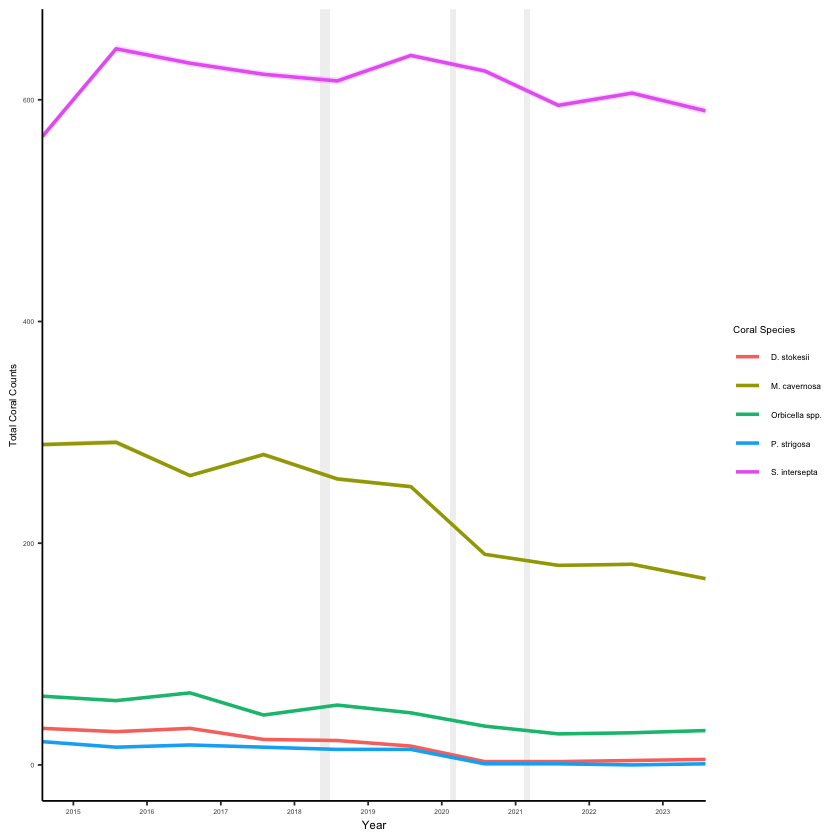

In [8]:

fig0_data <- CREMP_Counts %>%
  filter(Year > 2013) %>%
  mutate(
    Date = as.Date(Date, format = "%m/%d/%Y"),
    Standardized_Date = make_date(year = Year, month = 8, day = 1)
  )  %>%
  select(Date, Site_name, Year, Standardized_Date,
         Dichocoenia_stokesii, Stephanocoenia_intersepta,
         Montastraea_cavernosa, Pseudodiploria_strigosa, Orbicella_spp) %>%
  
  # Reshape to long format
  pivot_longer(
    cols = c(Dichocoenia_stokesii, Stephanocoenia_intersepta,
             Montastraea_cavernosa, Pseudodiploria_strigosa, Orbicella_spp),
    names_to = "Coral_Species",
    values_to = "Counts"
  ) %>%
  
  # Relabel coral species 
  mutate(Species_sample = case_when(
    Coral_Species == "Dichocoenia_stokesii" ~ "D. stokesii",
    Coral_Species == "Stephanocoenia_intersepta" ~ "S. intersepta",
    Coral_Species == "Montastraea_cavernosa" ~ "M. cavernosa",
    Coral_Species == "Pseudodiploria_strigosa" ~ "P. strigosa",
    Coral_Species == "Orbicella_spp" ~ "Orbicella spp.",
    TRUE ~ NA_character_
  )) %>%
  

  
  # Summarise total counts and standard error per species per year
  group_by(Standardized_Date, Species_sample, Year) %>%
  summarise(
    Total_Counts = sum(Counts, na.rm = TRUE),
    se = sd(Counts, na.rm = TRUE) / sqrt(n()),
    .groups = "drop"
  )

# Plot
fig0 <- ggplot(fig0_data, aes(x = Standardized_Date , y = Total_Counts, color = Species_sample, group = Species_sample)) +

  
  geom_rect(data = shade,
            aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax),
            inherit.aes = FALSE,
            fill = "grey70", alpha = 0.2) +

  #  standard error
  geom_ribbon(aes(ymin = Total_Counts - se,
                  ymax = Total_Counts + se,
                  fill = Species_sample),
              alpha = 0.2, 
              color = NA,
              show.legend = FALSE) +

  geom_line(size = 1) +


  scale_x_date(breaks = "1 year", date_labels = "%Y", expand = expansion(add = 0.5)) +


  labs(x = "Year", y = "Total Coral Counts", color = "Coral Species") +
  theme_classic() +
  theme(
    axis.title.x = element_text(size = 7),
    axis.title.y = element_text(size = 6),
    axis.text.x = element_text(size = 4),
    axis.text.y = element_text(size = 4),
    legend.text = element_text(size = 5),
    legend.title = element_text(size = 6)
  )


fig0


In [9]:

CREMP_Counts %>%
  mutate(
    Date = as.Date(Date, format = "%m/%d/%Y"),
    Standardized_Date = make_date(year = Year, month = 8, day = 1)
  )  %>%

  filter(Year > 2017) %>%
  # Pivot longer to reshape species columns
  select(Date, Site_name, Year, Standardized_Date,
         Colpophyllia_natans, Diploria_labyrinthiformis,
         Eusmilia_fastigiata, Meandrina_meandrites,
         Mycetophyllia_spp, Siderastrea_siderea, Porites_astreoides) %>%
  pivot_longer(
    cols = c(Colpophyllia_natans, Diploria_labyrinthiformis,
             Eusmilia_fastigiata, Meandrina_meandrites,
             Mycetophyllia_spp, Siderastrea_siderea, Porites_astreoides),
    names_to = "Coral_Species",
    values_to = "Counts"
  ) %>%
  
  # Relabel
  mutate(Species_sample = case_when(
    Coral_Species == "Colpophyllia_natans" ~ "C. natans",
    Coral_Species == "Diploria_labyrinthiformis" ~ "D. labyrinthiformis",
    Coral_Species == "Eusmilia_fastigiata" ~ "E. fastigiata",
    Coral_Species == "Meandrina_meandrites" ~ "M. meandrites",
    Coral_Species == "Mycetophyllia_spp" ~ "Mycetophyllia spp.",
    Coral_Species == "Siderastrea_siderea" ~ "S. siderea",
    Coral_Species == "Porites_astreoides" ~ "P. astreoides",
    TRUE ~ NA_character_
  )) %>%
  
  filter(!is.na(Counts) & Counts > 0) %>%
  
  # Group by Year and Species
  group_by(Year, Species_sample, Standardized_Date) %>%
  summarise(
    mean_count = sum(Counts, na.rm = TRUE),
    se_count = sd(Counts, na.rm = TRUE) / sqrt(n()),
    .groups = "drop"
  )


Year,Species_sample,Standardized_Date,mean_count,se_count
<int>,<chr>,<date>,<int>,<dbl>
2018,C. natans,2018-08-01,64,0.5773503
2018,D. labyrinthiformis,2018-08-01,5,0.2500000
2018,E. fastigiata,2018-08-01,3,0.0000000
2018,M. meandrites,2018-08-01,4,0.0000000
2018,Mycetophyllia spp.,2018-08-01,13,0.3379313
2018,P. astreoides,2018-08-01,134,1.2808688
2018,S. siderea,2018-08-01,975,5.6468787
2019,C. natans,2019-08-01,51,0.4934466
2019,D. labyrinthiformis,2019-08-01,6,0.2886751


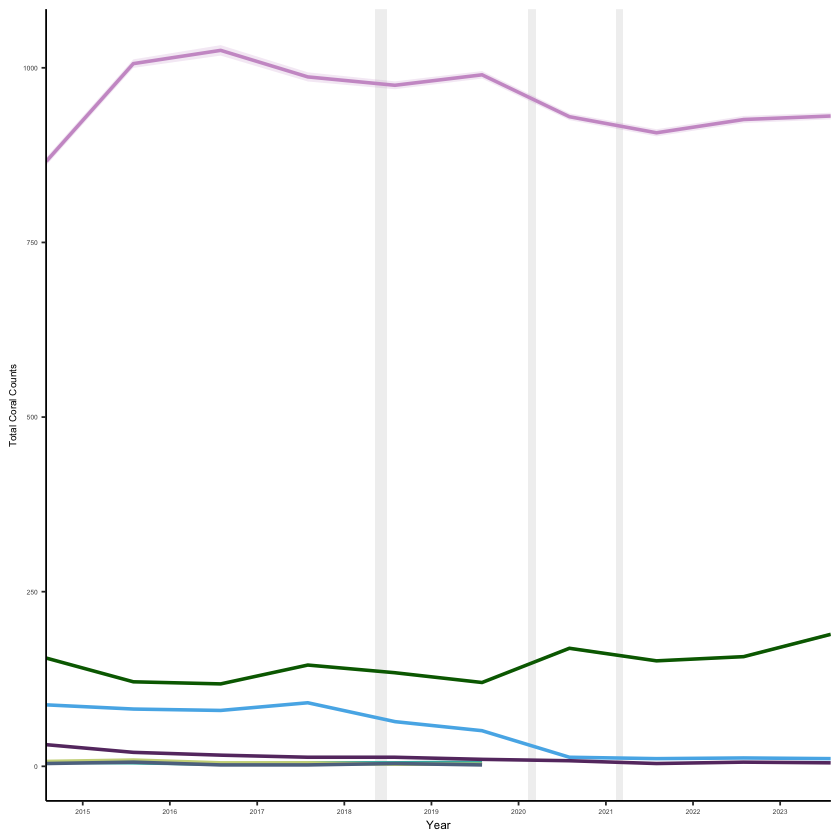

In [10]:



summary_counts3 <- CREMP_Counts %>%
  mutate(
    Date = as.Date(Date, format = "%m/%d/%Y"),
    Standardized_Date = make_date(year = Year, month = 8, day = 1)
  )  %>%

  filter(Year > 2013) %>%
  # Pivot longer to reshape species columns
  select(Date, Site_name, Year, Standardized_Date,
         Colpophyllia_natans, Diploria_labyrinthiformis,
         Eusmilia_fastigiata, Meandrina_meandrites,
         Mycetophyllia_spp, Siderastrea_siderea, Porites_astreoides) %>%
  pivot_longer(
    cols = c(Colpophyllia_natans, Diploria_labyrinthiformis,
             Eusmilia_fastigiata, Meandrina_meandrites,
             Mycetophyllia_spp, Siderastrea_siderea, Porites_astreoides),
    names_to = "Coral_Species",
    values_to = "Counts"
  ) %>%
  
  # Relabel 
  mutate(Species_sample = case_when(
    Coral_Species == "Colpophyllia_natans" ~ "C. natans",
    Coral_Species == "Diploria_labyrinthiformis" ~ "D. labyrinthiformis",
    Coral_Species == "Eusmilia_fastigiata" ~ "E. fastigiata",
    Coral_Species == "Meandrina_meandrites" ~ "M. meandrites",
    Coral_Species == "Mycetophyllia_spp" ~ "Mycetophyllia spp.",
    Coral_Species == "Siderastrea_siderea" ~ "S. siderea",
    Coral_Species == "Porites_astreoides" ~ "P. astreoides",
    TRUE ~ NA_character_
  )) %>%
  
  filter(!is.na(Counts) & Counts > 0) %>%
  
  # Group by Year and Species
  group_by(Year, Species_sample, Standardized_Date) %>%
  summarise(
    mean_count = sum(Counts, na.rm = TRUE),
    se_count = sd(Counts, na.rm = TRUE) / sqrt(n()),
    .groups = "drop"
  )

#Plot 
fig1 <- ggplot(summary_counts3, aes(x = Standardized_Date, y = mean_count, color = Species_sample, group = Species_sample)) +

  geom_rect(data = shade,
            aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax),
            inherit.aes = FALSE,
            fill = "grey70", alpha = 0.2) +

  #  standard error 
  geom_ribbon(aes(ymin = mean_count - se_count,
                  ymax = mean_count + se_count,
                  fill = Species_sample),
              alpha = 0.2, color = NA, show.legend = FALSE) +

  geom_line(size = 1) +

    scale_x_date(breaks = "1 year", date_labels = "%Y", expand = expansion(add = 0.5)) +


  scale_color_manual(values = c(
    "#56B4E9", "#40B5AD", "#CBD588", "#5E738F", "#673770", "#006700", "#CD9BCD"
  )) +
  scale_fill_manual(values = c(
    "#56B4E9", "#40B5AD", "#CBD588", "#5E738F", "#673770", "#006700", "#CD9BCD"
  )) +

  labs(x = "Year", y = "Total Coral Counts", color = "Coral Species") +
  theme_classic() +
  theme(
    axis.title.x = element_text(size = 7),
    axis.title.y = element_text(size = 6),
    axis.text.x = element_text(size = 4),
    axis.text.y = element_text(size = 4),
    legend.text = element_text(size = 5),
    legend.title = element_text(size = 6)
  ) +
  guides(color = "none")


fig1


In [11]:

#  total LTA 
 CREMP_LTA %>%
 mutate(
    Date = as.Date(Date, format = "%m/%d/%Y"),
    Standardized_Date = make_date(year = Year, month = 8, day = 1)
  )  %>%
  filter(Year > 2017) %>%
  # Reshape to long format
  select(Date, Site_name, Year, Standardized_Date,
         Dichocoenia_stokesii, Stephanocoenia_intersepta,
         Montastraea_cavernosa, Pseudodiploria_strigosa, Orbicella_spp) %>%
  pivot_longer(
    cols = c(Dichocoenia_stokesii, Stephanocoenia_intersepta,
             Montastraea_cavernosa, Pseudodiploria_strigosa, Orbicella_spp),
    names_to = "Coral_Species",
    values_to = "LTA"
  ) %>%
  
  # Rename species 
  mutate(Species_sample = case_when(
    Coral_Species == "Dichocoenia_stokesii" ~ "D. stokesii",
    Coral_Species == "Stephanocoenia_intersepta" ~ "S. intersepta",
    Coral_Species == "Montastraea_cavernosa" ~ "M. cavernosa",
    Coral_Species == "Pseudodiploria_strigosa" ~ "P. strigosa",
    Coral_Species == "Orbicella_spp" ~ "Orbicella spp.",
    TRUE ~ NA_character_
  )) %>%
  
  filter(!is.na(LTA) & LTA > 0) %>%
  
  group_by(Year, Standardized_Date) %>%
  summarise(
    mean_lta = sum(LTA, na.rm = TRUE),
    se_lta = sd(LTA, na.rm = TRUE) / sqrt(n()),
    .groups = "drop"
  )


Year,Standardized_Date,mean_lta,se_lta
<int>,<date>,<dbl>,<dbl>
2018,2018-08-01,1368341.6,3930.211
2019,2019-08-01,1546123.2,4951.955
2020,2020-08-01,994521.2,4108.772
2021,2021-08-01,1006571.2,4067.737
2022,2022-08-01,883210.0,3929.075
2023,2023-08-01,873389.6,3617.597


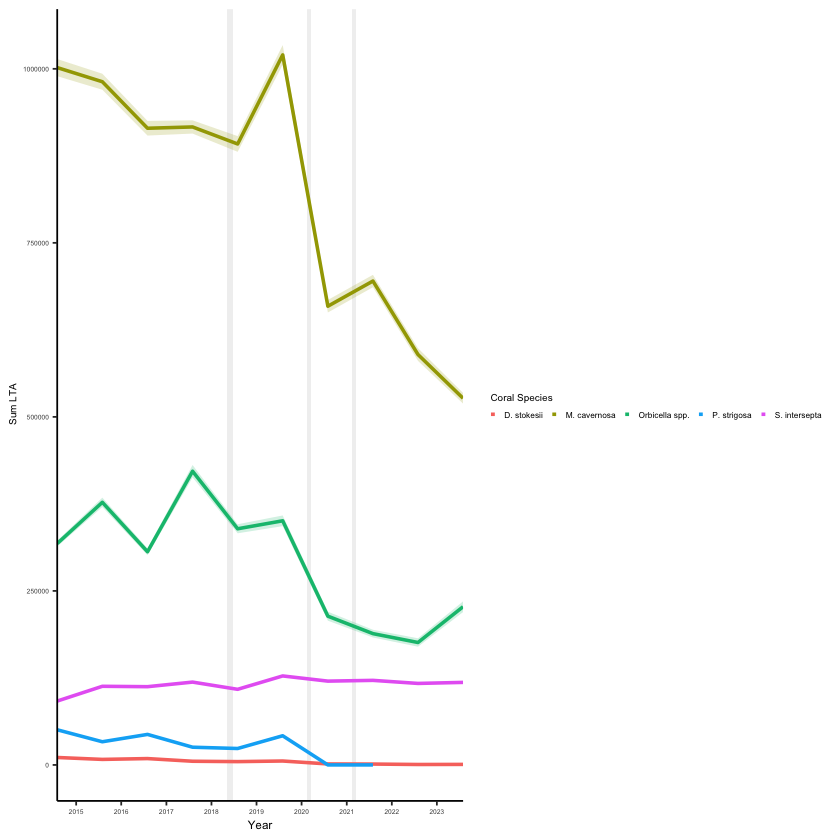

In [12]:


# total LTA 
summary_lta <- CREMP_LTA %>%
 mutate(
    Date = as.Date(Date, format = "%m/%d/%Y"),
    Standardized_Date = make_date(year = Year, month = 8, day = 1)
  )  %>%
  filter(Year > 2013) %>%
  # Reshape to long format
  select(Date, Site_name, Year, Standardized_Date,
         Dichocoenia_stokesii, Stephanocoenia_intersepta,
         Montastraea_cavernosa, Pseudodiploria_strigosa, Orbicella_spp) %>%
  pivot_longer(
    cols = c(Dichocoenia_stokesii, Stephanocoenia_intersepta,
             Montastraea_cavernosa, Pseudodiploria_strigosa, Orbicella_spp),
    names_to = "Coral_Species",
    values_to = "LTA"
  ) %>%
  
  # Rename species 
  mutate(Species_sample = case_when(
    Coral_Species == "Dichocoenia_stokesii" ~ "D. stokesii",
    Coral_Species == "Stephanocoenia_intersepta" ~ "S. intersepta",
    Coral_Species == "Montastraea_cavernosa" ~ "M. cavernosa",
    Coral_Species == "Pseudodiploria_strigosa" ~ "P. strigosa",
    Coral_Species == "Orbicella_spp" ~ "Orbicella spp.",
    TRUE ~ NA_character_
  )) %>%
  
  filter(!is.na(LTA) & LTA > 0) %>%
  
  group_by(Year, Species_sample, Standardized_Date) %>%
  summarise(
    mean_lta = sum(LTA, na.rm = TRUE),
    se_lta = sd(LTA, na.rm = TRUE) / sqrt(n()),
    .groups = "drop"
  )

# Plot
fig2 <- ggplot(summary_lta, aes(x = Standardized_Date, y = mean_lta, color = Species_sample, group = Species_sample)) +


  geom_rect(data = shade,
            aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax),
            inherit.aes = FALSE,
            fill = "grey70",
            alpha = 0.2) +

  # SE 
  geom_ribbon(aes(ymin = mean_lta - se_lta,
                  ymax = mean_lta + se_lta,
                  fill = Species_sample),
              alpha = 0.2, color = NA, show.legend = FALSE) +

  geom_line(size = 1) +

      scale_x_date(breaks = "1 year", date_labels = "%Y", expand = expansion(add = 0.5)) +


  labs(x = "Year", y = " Sum LTA", color = "Coral Species") +
  theme_classic() +
  theme(
    axis.title.x = element_text(size = 7),
    axis.title.y = element_text(size = 6),
    axis.text.x = element_text(size = 4),
    axis.text.y = element_text(size = 4),
    legend.text = element_text(size = 5),
    legend.title = element_text(size = 6)
  ) +
  guides(color = guide_legend(keywidth = 0.20, keyheight = 0.25, nrow = 1))


fig2




In [13]:
# total LTA 
CREMP_LTA %>%
 mutate(
    Date = as.Date(Date, format = "%m/%d/%Y"),
    Standardized_Date = make_date(year = Year, month = 8, day = 1)
  )  %>%
  mutate(Date = as.Date(Date, format = "%m/%d/%Y")) %>%
 mutate(Month = floor_date(Date, unit = "month")) %>%
 mutate(Month_Year = format(Date, "%Y-%m")) %>%
  filter(year(Date) > 2013) %>%
  select( Site_name, Year, Standardized_Date,
         Colpophyllia_natans, Diploria_labyrinthiformis,
         Eusmilia_fastigiata, Meandrina_meandrites,
         Mycetophyllia_spp, Siderastrea_siderea, Porites_astreoides) %>%
  pivot_longer(
    cols = c(Colpophyllia_natans, Diploria_labyrinthiformis,
             Eusmilia_fastigiata, Meandrina_meandrites,
             Mycetophyllia_spp, Siderastrea_siderea, Porites_astreoides),
    names_to = "Coral_Species",
    values_to = "LTA"
  ) %>%
  mutate(Species_sample = case_when(
    Coral_Species == "Colpophyllia_natans" ~ "C. natans",
    Coral_Species == "Diploria_labyrinthiformis" ~ "D. labyrinthiformis",
    Coral_Species == "Eusmilia_fastigiata" ~ "E. fastigiata",
    Coral_Species == "Meandrina_meandrites" ~ "M. meandrites",
    Coral_Species == "Mycetophyllia_spp" ~ "Mycetophyllia spp.",
    Coral_Species == "Siderastrea_siderea" ~ "S. siderea",
    Coral_Species == "Porites_astreoides" ~ "P. astreoides",
    TRUE ~ NA_character_
  )) %>%
  group_by(Year, Standardized_Date) %>%
  summarise(
    mean_lta = sum(LTA, na.rm = TRUE),
    se_lta = sd(LTA, na.rm = TRUE) / sqrt(n()),
    .groups = "drop"
  )


Year,Standardized_Date,mean_lta,se_lta
<int>,<date>,<dbl>,<dbl>
2014,2014-08-01,797656.2,1352.3151
2015,2015-08-01,807926.0,1307.1870
2016,2016-08-01,747911.3,1202.1173
2017,2017-08-01,801135.7,1371.5488
2018,2018-08-01,692208.3,1184.3530
2019,2019-08-01,647266.8,1020.3125
2020,2020-08-01,463225.5,882.7934
2021,2021-08-01,419463.7,805.4067
2022,2022-08-01,419214.6,801.6349


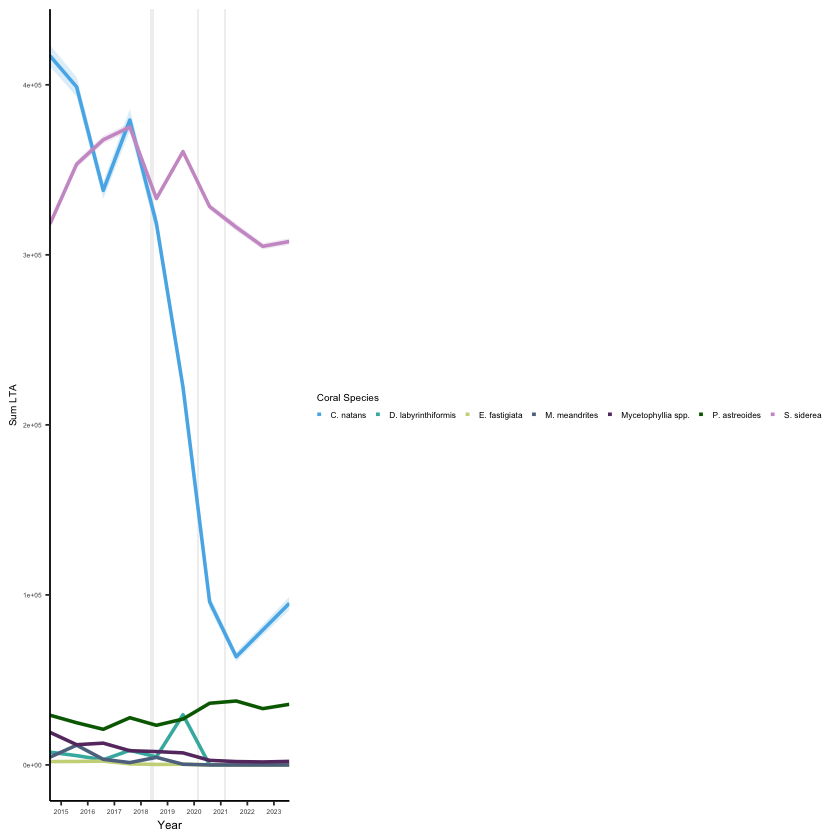

In [14]:

# total LTA 
summary_lta3 <- CREMP_LTA %>%
 mutate(
    Date = as.Date(Date, format = "%m/%d/%Y"),
    Standardized_Date = make_date(year = Year, month = 8, day = 1)
  )  %>%
  mutate(Date = as.Date(Date, format = "%m/%d/%Y")) %>%
 mutate(Month = floor_date(Date, unit = "month")) %>%
 mutate(Month_Year = format(Date, "%Y-%m")) %>%
  filter(year(Date) > 2013) %>%
  select( Site_name, Year, Standardized_Date,
         Colpophyllia_natans, Diploria_labyrinthiformis,
         Eusmilia_fastigiata, Meandrina_meandrites,
         Mycetophyllia_spp, Siderastrea_siderea, Porites_astreoides) %>%
  pivot_longer(
    cols = c(Colpophyllia_natans, Diploria_labyrinthiformis,
             Eusmilia_fastigiata, Meandrina_meandrites,
             Mycetophyllia_spp, Siderastrea_siderea, Porites_astreoides),
    names_to = "Coral_Species",
    values_to = "LTA"
  ) %>%
  mutate(Species_sample = case_when(
    Coral_Species == "Colpophyllia_natans" ~ "C. natans",
    Coral_Species == "Diploria_labyrinthiformis" ~ "D. labyrinthiformis",
    Coral_Species == "Eusmilia_fastigiata" ~ "E. fastigiata",
    Coral_Species == "Meandrina_meandrites" ~ "M. meandrites",
    Coral_Species == "Mycetophyllia_spp" ~ "Mycetophyllia spp.",
    Coral_Species == "Siderastrea_siderea" ~ "S. siderea",
    Coral_Species == "Porites_astreoides" ~ "P. astreoides",
    TRUE ~ NA_character_
  )) %>%
  group_by(Species_sample, Year, Standardized_Date) %>%
  summarise(
    mean_lta = sum(LTA, na.rm = TRUE),
    se_lta = sd(LTA, na.rm = TRUE) / sqrt(n()),
    .groups = "drop"
  )



 #Plot
fig3 <- ggplot(summary_lta3, aes(x =Standardized_Date, y = mean_lta, color = Species_sample, group = Species_sample)) +
  
  

  geom_rect(data = shade,
            aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax),
            inherit.aes = FALSE,
            fill = "grey70", alpha = 0.2) +

  # SE
  geom_ribbon(aes(ymin = mean_lta - se_lta, ymax = mean_lta + se_lta, fill = Species_sample),
              alpha = 0.2, color = NA, show.legend = FALSE) +


  geom_line(size = 1) +
  scale_x_date(breaks = "1 year", date_labels = "%Y", expand = expansion(add = 0.5)) +


  scale_color_manual(values = c(
    "#56B4E9", "#40B5AD", "#CBD588", "#5E738F", "#673770", "#006700", "#CD9BCD"
  )) +
  scale_fill_manual(values = c(
    "#56B4E9", "#40B5AD", "#CBD588", "#5E738F", "#673770", "#006700", "#CD9BCD"
  )) +

  labs(x = "Year", y = "Sum LTA", color = "Coral Species") +
  theme_classic() +
  theme(
    axis.title.x = element_text(size = 7),
    axis.title.y = element_text(size = 6),
    axis.text.x = element_text(size = 4),
    axis.text.y = element_text(size = 4),
    legend.text = element_text(size = 5),
    legend.title = element_text(size = 6)
  ) +
  guides(color = guide_legend(keywidth = 0.20, keyheight = 0.25, nrow = 1))
fig3


In [15]:
colors <- c("#0bdbb6", "#06402B","#56B4E9", "#8A7C64","#C52E6D", "lightgreen",
"#AD6F3B", "#6B5B95", "#8569D5", "#6F8FAF", "#5F7FC7",
"#56B4E9", "#40B5AD", "#8A7C64", "#CBD588", "#5E738F",
"#673770", "#006700", "#CD9BCD", "#D1A33D", "#D14285",
"#FAD02E", "#F28D35", "#C52E6D", "#6B5B95", "grey", "#AD6F3B",
 "#56B4E9", "#40B5AD", "#CBD588",
"#5E738F", "#673770", "#006700", "#CD9BCD", "#D1A33D",
"#FAD02E", "#F28D35", "#C52E6D", "#6B5B95", "#AD6F3B",
"#6F8FAF", "#8A7C64")

In [16]:
 summary_cover = CREMP_Cover %>%
 filter(Year > 2017) %>%
  pivot_longer(
    cols = Cyanobacteria:Zoanthidea,
    names_to = "Cover",
    values_to = "Cover_Counts"
  ) %>%
  mutate(
    Date = as.Date(Date, format = "%m/%d/%Y"),
    Standardized_Date = make_date(year = Year, month = 8, day = 1)
  ) %>%
  group_by(Date, Site_name, Year, Subregion) %>%
  mutate(Total_Cover = sum(Cover_Counts, na.rm = TRUE)) %>%
  ungroup() %>%
  mutate(Percent_Cover = if_else(Total_Cover > 0, (Cover_Counts / Total_Cover) * 100, NA_real_)) %>%
  
  # Now continue with your summarizing
  filter(
    Year > 2010,
    !Cover %in% c("Unknown", "Seagrass"),
    !is.na(Percent_Cover),
    Percent_Cover > 0
  ) %>%
  group_by(Year, Cover, Standardized_Date, Subregion) %>%
  summarise(
    mean_log = mean(Percent_Cover, na.rm = TRUE),
    se_log = sd(Percent_Cover, na.rm = TRUE) / sqrt(n()),
    .groups = "drop"
  ) %>%
  filter(Cover == "Cyanobacteria")
summary_cover

Year,Cover,Standardized_Date,Subregion,mean_log,se_log
<int>,<chr>,<date>,<chr>,<dbl>,<dbl>
2018,Cyanobacteria,2018-08-01,LK,0.25900154,0.04322421
2019,Cyanobacteria,2019-08-01,LK,0.35469274,0.15367373
2020,Cyanobacteria,2020-08-01,LK,0.11115477,0.03187861
2021,Cyanobacteria,2021-08-01,LK,0.06071381,0.01421268
2022,Cyanobacteria,2022-08-01,LK,0.16596479,0.03488359
2023,Cyanobacteria,2023-08-01,LK,0.47266566,0.14330998


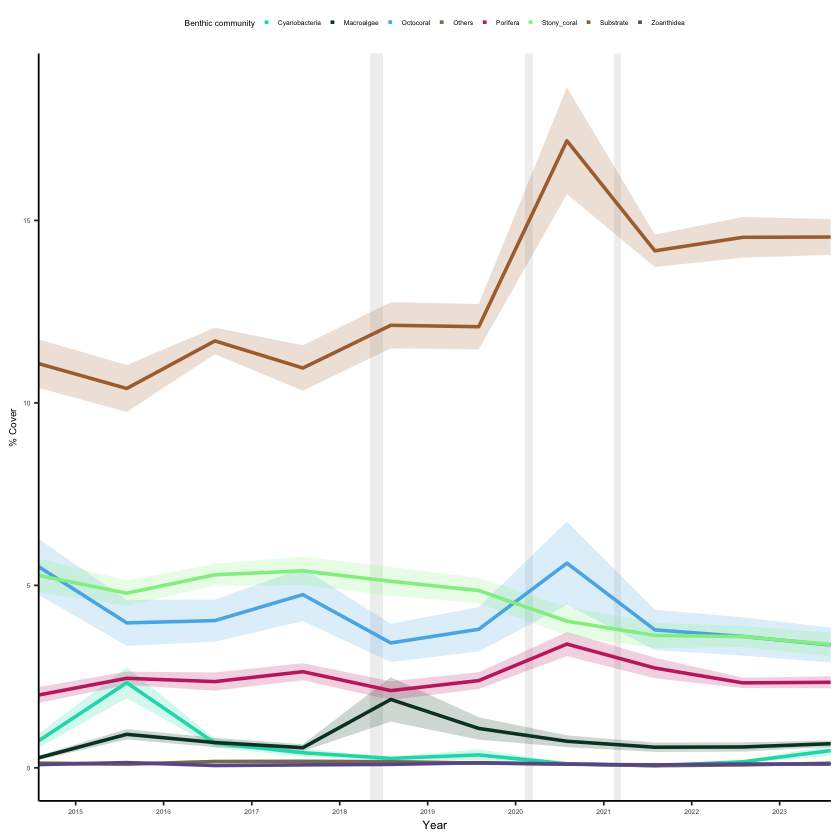

In [17]:
summary_cover = CREMP_Cover %>%
 filter(Year > 2013) %>%
  pivot_longer(
    cols = Cyanobacteria:Zoanthidea,
    names_to = "Cover",
    values_to = "Cover_Counts"
  ) %>%
  mutate(
    Date = as.Date(Date, format = "%m/%d/%Y"),
    Standardized_Date = make_date(year = Year, month = 8, day = 1)
  ) %>%
  group_by(Date, Site_name, Year, Subregion) %>%
  mutate(Total_Cover = sum(Cover_Counts, na.rm = TRUE)) %>%
  ungroup() %>%
  mutate(Percent_Cover = if_else(Total_Cover > 0, (Cover_Counts / Total_Cover) * 100, NA_real_)) %>%
  
  # Now continue with your summarizing
  filter(
    Year > 2010,
    !Cover %in% c("Unknown", "Seagrass"),
    !is.na(Percent_Cover),
    Percent_Cover > 0
  ) %>%
  group_by(Year, Cover, Standardized_Date, Subregion) %>%
  summarise(
    mean_log = mean(Percent_Cover, na.rm = TRUE),
    se_log = sd(Percent_Cover, na.rm = TRUE) / sqrt(n()),
    .groups = "drop"
  ) 

# Plot
fig4 <- ggplot(summary_cover, aes(x = Standardized_Date, y = mean_log, color = Cover, group = Cover)) +

  geom_rect(data = shade,
            aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax),
            inherit.aes = FALSE,
            fill = "grey70", alpha = 0.2) +
 
  # SE 
  geom_ribbon(aes(ymin = mean_log - se_log, ymax = mean_log + se_log, fill = Cover),
              alpha = 0.2, color = NA, show.legend = FALSE) +

  geom_line(size = 1) +





  scale_color_manual(values = colors) +
  scale_fill_manual(values = colors) +


 scale_x_date(breaks = "1 year", date_labels = "%Y", expand = expansion(add = 0.5)) +

  labs(x = "Year", y = "% Cover", color = "Benthic community") +
  theme_classic() +
  theme(
    axis.title.x = element_text(size = 7),
    axis.title.y = element_text(size = 6),
    axis.text.x = element_text(size = 4),
    axis.text.y = element_text(size = 4),
    legend.text = element_text(size = 4),
    legend.title = element_text(size = 5),
    legend.position = "top"
  ) +
  guides(color = guide_legend(keywidth = 0.10, keyheight = 0.25, nrow = 1))

fig4



In [18]:
# Shade 
shade1 <- tibble(
  xmin = as.Date(c("2018-05-08", "2020-02-11", "2021-02-11")),
  xmax = as.Date(c("2018-06-28", "2020-03-14" , "2021-03-14")),
  ymin = -Inf,
  ymax = Inf
)

In [19]:


# filter for Stony coral tissue loss disease
drm_filtered <- drmT12 %>%
  mutate(Date = as.Date(Date, format = "%m/%d/%Y")) %>%
  mutate(Year = year(Date)) %>%
filter(Year<=2023)  %>%
filter(str_detect(dCondition, "STL"))

# Count samples per date
drm_counts_by_date <- drm_filtered %>%
  count(Date)

# all dates to show 2018 = 0
all_dates <- tibble(Date = seq.Date(from = as.Date("2014-12-31"),
                                    to = as.Date("2022-12-31"),
                                    by = "day"))


drm_counts_complete <- full_join(all_dates, drm_counts_by_date, by = "Date") 


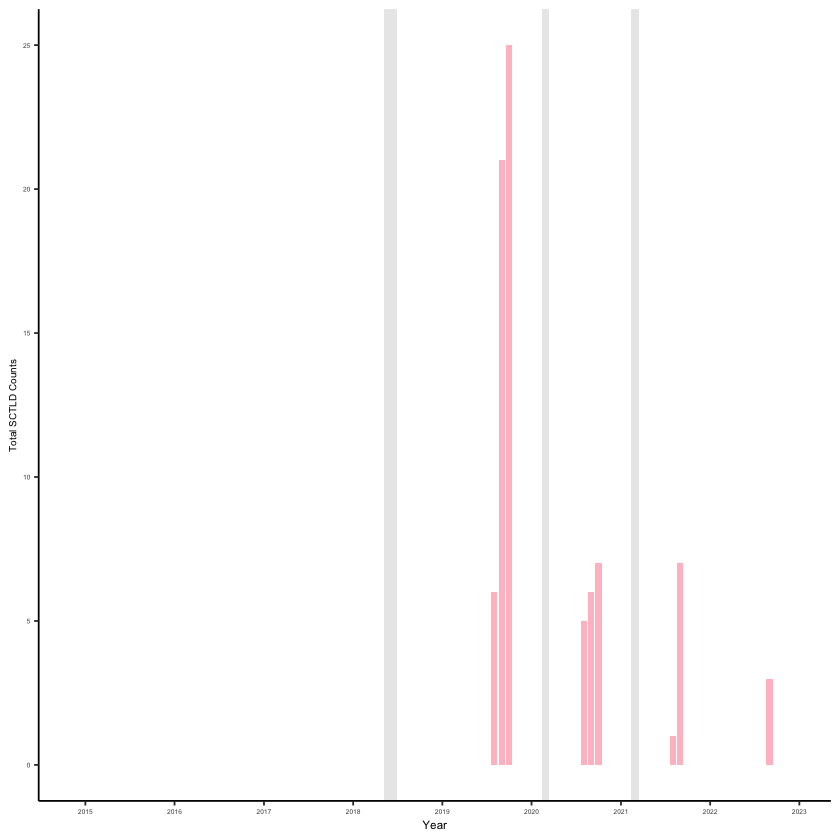

In [20]:
drm_monthly <- drm_counts_complete %>%
  mutate(Month = floor_date(Date, "month")) %>%
  group_by(Month) %>%
  summarise(n = sum(n, na.rm = TRUE))

#plot
fig5=ggplot(drm_monthly, aes(x = Month, y = n)) +
  geom_col(fill = "pink") +
   geom_rect(data = shade1,
            aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax),
            inherit.aes = FALSE,
            fill = "grey70", alpha = 0.3) +
  scale_x_date(breaks = "1 year", date_labels = "%Y") +
  labs(x = "Year", y = "Total SCTLD Counts") +
  theme_classic() +
theme(
    axis.title.x = element_text(size = 7),
    axis.title.y = element_text(size = 6),
    axis.text.x = element_text(size = 4),
    axis.text.y = element_text(size = 4),
    legend.text = element_text(size = 4),
    legend.title = element_text(size = 5),
    legend.position = "top"
  )

fig5

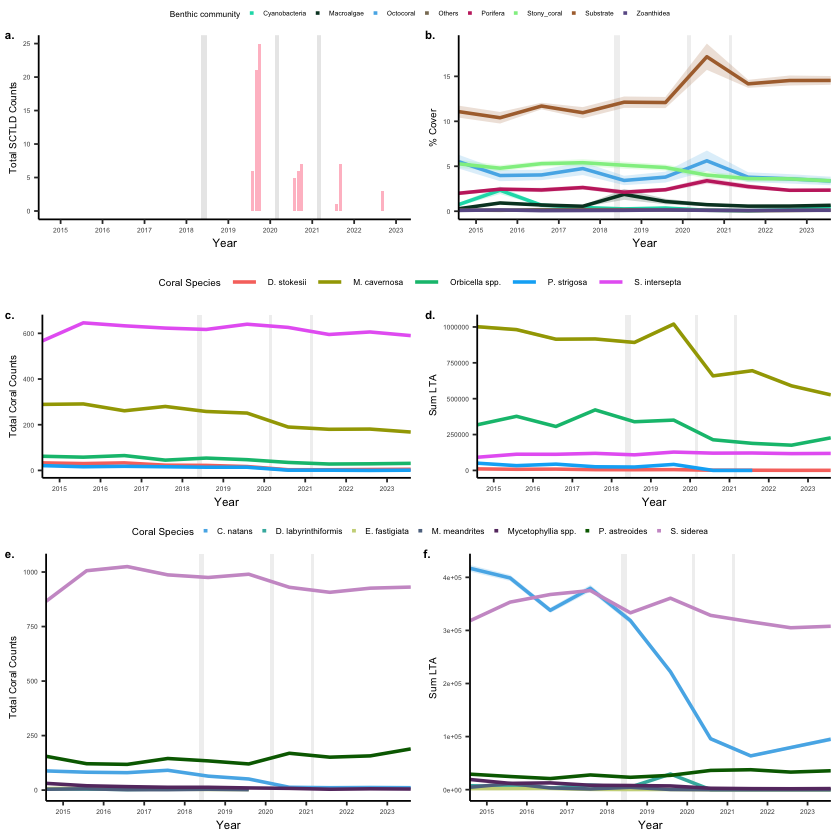

In [22]:
#final figure

figs_coral3=ggarrange(fig0,fig2, nrow =1 , ncol=2, common.legend = TRUE,
                           labels = c("c.","d."), 
                     #label.x=-0.03,
                       font.label = list(size = 7, color = "black")

                    
                    )


figs_coral2=ggarrange(fig1,fig3, nrow =1 , ncol=2, common.legend = TRUE,
                           labels = c("e.","f."), 
                     #label.x=-0.03,
                       font.label = list(size = 7, color = "black"))


figs_coral=ggarrange(fig5,fig4, nrow =1 , ncol=2, common.legend = TRUE,
                           labels = c("a.","b."), 
                     #label.x=-0.03,
                       font.label = list(size = 7, color = "black"))



figs_final=ggarrange(figs_coral, figs_coral3, figs_coral2, nrow =3 , ncol=1, common.legend = FALSE,
                          labels = c("","", "e."), heights= c(0.8, 0.8, 1),
                     label.x=-0.03,
                      font.label = list(size = 7, color = "black"))

                     figs_final
ggsave("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/Figures/Supp_Fig1.png",
    width = 5.5, height =6.5, units = "in", dpi=300)